### **Project Introduction**

The goal of this project is to analyze and optimize the inventory and fuel ordering practices at a network of gas stations. We aim to assess how well the gas stations are managing their fuel levels, identify potential areas for improvement, and propose strategies to reduce operational costs. The analysis involves several key tasks, including evaluating current inventory management practices, recommending improved ordering strategies, identifying the best days for fuel purchases, and assessing the feasibility of increasing tank capacities at certain locations.

We use various datasets, including fuel levels, invoices, and tank capacities, to identify trends, opportunities for savings, and potential operational inefficiencies. Additionally, we apply machine learning and data analysis techniques to identify patterns in fuel purchase behavior, price variations, and inventory management.

By optimizing the ordering strategies and inventory management practices, the project aims to help gas stations improve their cost-efficiency and reduce the risk of stockouts while maximizing savings through discount optimization.

### **Methodology**

This project follows a systematic approach to address each of the outlined objectives. Below is an overview of the methodology used in this project:

1. **Data Preprocessing**
2. **Visualizing Fuel Levels**
3. **Evaluating Purchasing Patterns**
4. **Quantifying Maximum Potential Savings**
5. **Identifying the Best Day for Fuel Orders**
6. **Evaluating the Feasibility of Adding Tanks**

This methodology provides a comprehensive framework for analyzing and improving fuel ordering and inventory practices. By applying these techniques, the project not only aims to optimize inventory management but also provides actionable insights to reduce costs and improve overall operational efficiency.

### 1. **Evaluate Current Inventory Management Practices**

The goal of this analysis is to evaluate the gas stations' current fuel inventory management and order quantities. This includes reviewing data preprocessing steps, visualizing fuel levels, and quantifying the current performance of the stations.

#### **Data Preprocessing**
- **Concatenate Fuel_Level_Part_1.csv and Fuel_Level_Part_2.csv**: The first step was to merge the two parts of the fuel level dataset into one complete dataset.
  
- **Merge the Tanks.csv, Locations.csv, and Invoices.csv datasets**: Afterward, we merged the tank information, station locations, and invoices data into one dataset for a comprehensive analysis.

- **Clean datasets and handle missing values**: Missing data was cleaned, ensuring the integrity of the analysis by handling any gaps in the data appropriately.


#### Imports
We begin by importing the necessary libraries:
- **`pandas`**: For data manipulation and analysis.
- **`numpy`**: For numerical operations.
- **`matplotlib.pyplot`** and **`seaborn`**: For creating visualizations such as plots and charts.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading Datasets
Here, we load five different datasets:
- **`Locations.csv`**: Contains information about the locations of the gas stations.
- **`Tanks.csv`**: Contains data about the tanks used to store fuel at each gas station.
- **`Invoices.csv`**: Contains the invoice details for the fuel purchases made at each location.
- **`Fuel_Level_Part_1.csv`** and **`Fuel_Level_Part_2.csv`**: Contain data about fuel levels across different gas stations.

In [3]:
# Load datasets
tanks = pd.read_csv('Tanks-1.csv')
invoices = pd.read_csv('Invoices-1.csv')
fuel_level_part_1 = pd.read_csv('Fuel_Level_Part_1-1.csv')
fuel_level_part_2 = pd.read_csv('Fuel_Level_Part_2-1.csv')
locations = pd.read_csv('Locations-1.csv')

#### concatenation
We concatenate the two fuel level datasets (`fuel_level_part_1` and `fuel_level_part_2`) into a single DataFrame.

In [7]:
fuel_level_part_1

,Tank ID,Fuel Level,Time stamp
0,T 12,27161.0,1/1/2017 0:10
1,T 12,27017.0,1/1/2017 0:25
2,T 12,26934.0,1/1/2017 0:40
3,T12,NaN,1/1/2017 0:45
4,T 12,26786.0,1/1/2017 0:55
...,...,...,...
885146,T 31,33770.0,8/15/2019 22:52
885147,T 31,33770.0,8/15/2019 23:08
885148,T 31,33770.0,8/15/2019 23:22
885149,T 31,33770.0,8/15/2019 23:37


In [11]:
fuel_level_part_1.rename(columns = {'Time stamp':'Time Stamp'},inplace = True)
fuel_level_part_1

,Tank ID,Fuel Level,Time Stamp
0,T 12,27161.0,1/1/2017 0:10
1,T 12,27017.0,1/1/2017 0:25
2,T 12,26934.0,1/1/2017 0:40
3,T12,NaN,1/1/2017 0:45
4,T 12,26786.0,1/1/2017 0:55
...,...,...,...
885146,T 31,33770.0,8/15/2019 22:52
885147,T 31,33770.0,8/15/2019 23:08
885148,T 31,33770.0,8/15/2019 23:22
885149,T 31,33770.0,8/15/2019 23:37


In [13]:
#change T12 to T 12, unify ID
fuel_level_part_1['Tank ID'].replace({'T12':'T 12'})
fuel_level_part_1

,Tank ID,Fuel Level,Time Stamp
0,T 12,27161.0,1/1/2017 0:10
1,T 12,27017.0,1/1/2017 0:25
2,T 12,26934.0,1/1/2017 0:40
3,T12,NaN,1/1/2017 0:45
4,T 12,26786.0,1/1/2017 0:55
...,...,...,...
885146,T 31,33770.0,8/15/2019 22:52
885147,T 31,33770.0,8/15/2019 23:08
885148,T 31,33770.0,8/15/2019 23:22
885149,T 31,33770.0,8/15/2019 23:37


In [15]:
fuel_level_part_2

,Tank ID,Fuel_Level,Timestamp
0,T 32,22327,1/1/2017 0:05
1,T 20,25215,1/1/2017 0:07
2,T 10,25700,1/1/2017 0:09
3,T 11,25685,1/1/2017 0:10
4,T 14,27138,1/1/2017 0:10
...,...,...,...
974504,T 32,27619,8/15/2019 23:53
974505,T 22,31548,8/15/2019 23:57
974506,T 16,53492,8/15/2019 23:57
974507,T 18,27081,8/15/2019 23:57


##### This line renames the column 'Fuel_level' to 'Fuel Level' and 'Timestamp' to 'Time Stamp' in the fuel_levels DataFrame to ensure consistent naming conventions.

In [19]:
#make the names of the cloumns same as fuel_level_part_1's 
fuel_level_part_2.rename(columns={'Fuel_Level': 'Fuel Level'}, inplace=True)
fuel_level_part_2.rename(columns={'Timestamp': 'Time Stamp'}, inplace=True)
fuel_level_part_2

,Tank ID,Fuel Level,Time Stamp
0,T 32,22327,1/1/2017 0:05
1,T 20,25215,1/1/2017 0:07
2,T 10,25700,1/1/2017 0:09
3,T 11,25685,1/1/2017 0:10
4,T 14,27138,1/1/2017 0:10
...,...,...,...
974504,T 32,27619,8/15/2019 23:53
974505,T 22,31548,8/15/2019 23:57
974506,T 16,53492,8/15/2019 23:57
974507,T 18,27081,8/15/2019 23:57


In [21]:
# Data Preprocessing
# Concatenate fuel level data
fuel_levels = pd.concat([fuel_level_part_1, fuel_level_part_2], ignore_index=True)

#### Merging Data
We perform multiple merges to combine the datasets:
1. First, we merge the `invoices` DataFrame with the `locations` DataFrame based on the columns `Invoice Gas Station Location` and `Gas Station Location`.
2. Then, we merge the resulting DataFrame with the `tanks` DataFrame based on `Invoice Gas Station Location` and `Tank Location`.

The final result, stored in the variable `df`, contains merged data from all the datasets: invoice details, gas station locations, and tank information.

In [24]:
# Merge datasets
df = merged_data = (
    invoices.merge(locations, left_on='Invoice Gas Station Location', right_on='Gas Station Location', how='left')
           .merge(tanks, left_on='Invoice Gas Station Location', right_on='Tank Location', how='left')
)

##### Generate summary statistics for numerical columns in the 'fuel_levels' DataFrame

In [27]:
fuel_levels.describe()

,Fuel Level
count,1.859658e+06
mean,2.561523e+04
std,1.403233e+04
min,1.484000e+03
25%,1.831400e+04
50%,2.491200e+04
75%,3.042000e+04
max,6.953100e+04


In [29]:
# Display the data before cleaning
print("Data Before Cleaning:")
merged_data.describe()

Data Before Cleaning:


,Invoice ID,Invoice Gas Station Location,Gross Purchase Cost,Amount Purchased,Gas Station Location,Gas Station Latitude,Gas Station Longitude,Tank Location,Tank Number,Tank Capacity
count,12418.000000,12533.000000,12412.000000,12412.000000,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000
mean,11413.946690,1.733184,12406.553183,10805.366608,1.725096,43.215425,-79.818483,1.725096,3.019317,41836.685824
std,819.959845,1.412739,7333.275226,6770.090061,1.338562,0.306261,0.202110,1.338562,1.650497,10544.707511
min,10000.000000,1.000000,94.635250,96.976000,1.000000,38.875955,-79.937057,1.000000,1.000000,5000.000000
25%,10705.000000,1.000000,8327.902000,7071.968000,1.000000,43.234670,-79.836510,1.000000,2.000000,40000.000000
50%,11411.500000,1.000000,10633.216690,9301.232000,1.000000,43.234670,-79.836510,1.000000,3.000000,40000.000000
75%,12126.000000,2.000000,13248.935000,11848.772000,2.000000,43.234670,-79.836510,2.000000,4.000000,40000.000000
max,12830.000000,41.000000,33118.552090,33826.560000,8.000000,43.319160,-77.024461,8.000000,6.000000,70000.000000


##### Handle missing values 
The ffill() method is used to fill missing values in the fuel_levels DataFrame by propagating the previous valid value forward. The inplace=True argument modifies the DataFrame in place, without creating a new object.

In [32]:
# Handle missing values using ffill()
fuel_levels.ffill(inplace=True)

##### Replace missing numerical values with 0
The fillna(0) method replaces all missing values (NaNs) in the merged_data DataFrame with 0. This is commonly done for numerical columns where a missing value may be treated as zero.

In [35]:
# Replace missing numerical values with 0
merged_data.fillna(0, inplace=True)

##### The `pd.to_numeric()` function converts the 'Fuel Level' column to a numeric type, replacing invalid values with NaN using `errors='coerce'`.

In [38]:
# Data Cleaning: Ensure consistent data types
fuel_levels['Fuel Level'] = pd.to_numeric(fuel_levels['Fuel Level'], errors='coerce')
merged_data['Amount Purchased'] = pd.to_numeric(merged_data['Amount Purchased'], errors='coerce')

In [40]:
# Display the data after cleaning
print("\nData After Cleaning:")
merged_data.describe()


Data After Cleaning:


,Invoice ID,Invoice Gas Station Location,Gross Purchase Cost,Amount Purchased,Gas Station Location,Gas Station Latitude,Gas Station Longitude,Tank Location,Tank Number,Tank Capacity
count,12533.000000,12533.000000,12533.000000,12533.000000,12533.000000,12533.000000,12533.000000,12533.000000,12533.000000,12533.000000
mean,11309.214873,1.733184,12286.773966,10701.046065,1.724408,43.198184,-79.786640,1.724408,3.018112,41819.995213
std,1360.402003,1.412739,7397.939696,6819.677857,1.338738,0.915742,1.606769,1.338738,1.651269,10575.658404
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-79.937057,0.000000,0.000000,0.000000
25%,10685.000000,1.000000,8324.116590,6994.800000,1.000000,43.234670,-79.836510,1.000000,2.000000,40000.000000
50%,11399.000000,1.000000,10599.148000,9266.000000,1.000000,43.234670,-79.836510,1.000000,3.000000,40000.000000
75%,12120.000000,2.000000,13248.935000,11782.320000,2.000000,43.234670,-79.836510,2.000000,4.000000,40000.000000
max,12830.000000,41.000000,33118.552090,33826.560000,8.000000,43.319160,0.000000,8.000000,6.000000,70000.000000


In [42]:
#1

##### The pd.to_datetime() function converts the 'Time Stamp' column to a datetime format

In [45]:
# Convert 'Time Stamp' to datetime format
fuel_levels['Time Stamp'] = pd.to_datetime(fuel_levels['Time Stamp'], errors='coerce')

In [46]:
# Remove rows with invalid 'Time Stamp'
if fuel_levels['Time Stamp'].isnull().any():
    print("Some rows have invalid 'Time Stamp'. These rows will be dropped.")
    fuel_levels = fuel_levels.dropna(subset=['Time Stamp'])

##### Fuel levels over time for each tank:
- The code visualizes fuel levels over time for each tank.
- It first creates a figure with a size of 15x8 inches.
- Then, for each unique `Tank ID`, it filters the data and plots the fuel levels against the 'Time Stamp' for that tank.
- The `plt.plot()` function is used to plot the data, with labels showing the tank number.
- The plot is given a title, and labels are added for the x-axis (Time) and y-axis (Fuel Level in Liters).
- A legend is added to identify each tank, and grid lines are enabled for better readability.
- Finally, `plt.show()` displays the plot.

This visualization helps in analyzing the fuel levels over time for each tank in the gas station.

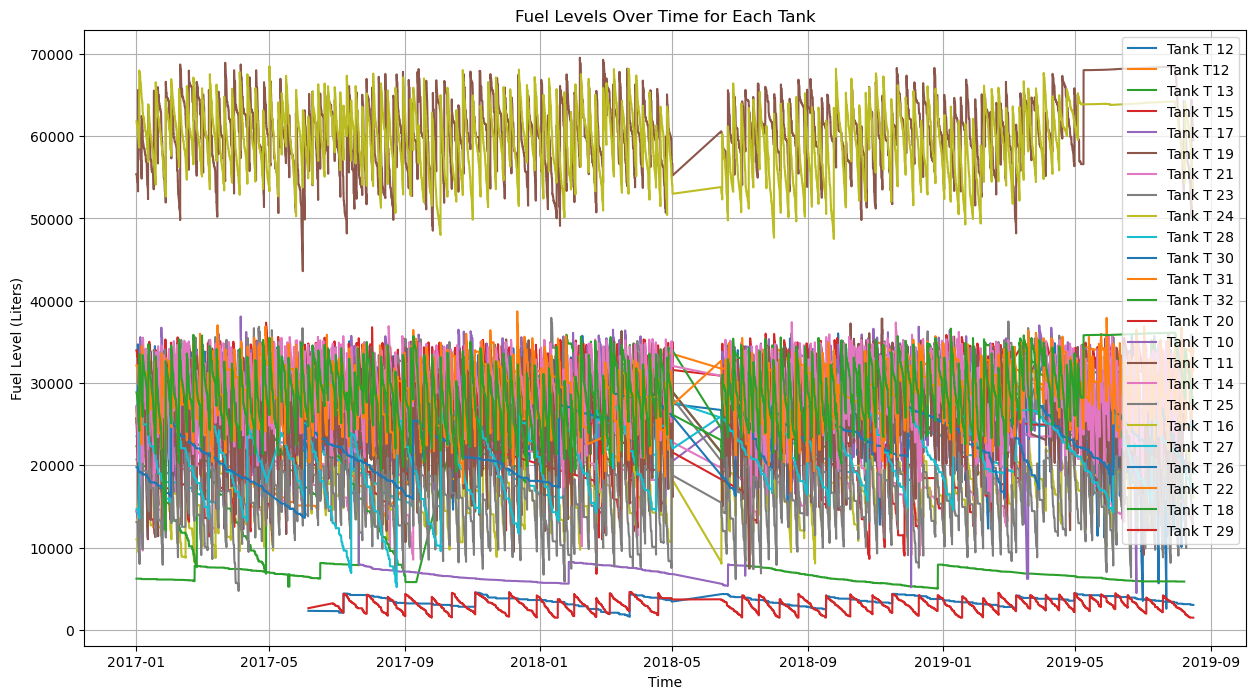

In [62]:
# Visualize Fuel Levels
plt.figure(figsize=(15, 8))
for tank_id in fuel_levels['Tank ID'].unique():
    tank_data = fuel_levels[fuel_levels['Tank ID'] == tank_id]
    plt.plot(
        tank_data['Time Stamp'], 
        tank_data['Fuel Level'], 
        label=f'Tank {tank_id}'
    )
plt.title('Fuel Levels Over Time for Each Tank')
plt.xlabel('Time')
plt.ylabel('Fuel Level (Liters)')
plt.legend(loc='upper right')
plt.grid()
plt.show()

#### Stations at risk of stockouts
Here we identifies the tanks that are at risk of stockouts based on a defined threshold (5000 liters). Tanks with fuel levels below the threshold are considered at risk, and those above are considered effectively managed.

In [65]:
# Identify stations at risk of stockouts
threshold = 5000  # Define a stockout threshold, e.g., 5000 liters
at_risk = fuel_levels[fuel_levels['Fuel Level'] < threshold]['Tank ID'].unique()
effective = fuel_levels[fuel_levels['Fuel Level'] >= threshold]['Tank ID'].unique()

#### Results:
Tanks at risk of stockouts: `['T 12' 'T 30']`

#### Explanation:
- The output shows the tank IDs ('T 12' and 'T 30') that have fuel levels below the threshold and are thus at risk of running out of stock.

In [68]:
print(f"Tanks at risk of stockouts: {at_risk}")

Tanks at risk of stockouts: ['T 12' 'T 30' 'T 25' 'T 29' 'T 10']


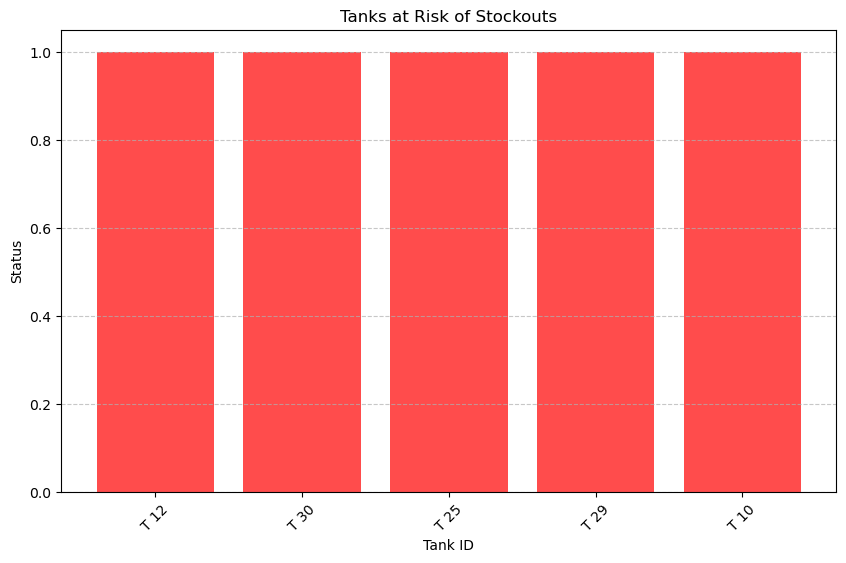

In [70]:
# Plot for Tanks at Risk of Stockouts
plt.figure(figsize=(10, 6))
plt.bar(at_risk, [1] * len(at_risk), color='red', alpha=0.7)
plt.title('Tanks at Risk of Stockouts')
plt.xlabel('Tank ID')
plt.ylabel('Status')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Results:
Tanks with effective inventory management: `{'T 32', 'T 29', 'T 15', 'T 24', 'T 16', 'T 20', 'T 14', 'T 23', 'T 31', 'T 19', 'T 10', 'T 13', 'T 26', 'T 21', 'T 17', 'T 28', 'T 22', 'T 27', 'T 11', 'T12', 'T 25', 'T 18'}`

#### Explanation:
- The output shows the tank IDs that have fuel levels above the threshold and are effectively managed, indicating that these tanks are not at risk of stockouts.

In [73]:
print(f"Tanks with effective inventory management: {set(fuel_levels['Tank ID'].unique()) - set(at_risk)}")

Tanks with effective inventory management: {'T 31', 'T 22', 'T 28', 'T 26', 'T 23', 'T 15', 'T 17', 'T 20', 'T 19', 'T 13', 'T 27', 'T 11', 'T 16', 'T 24', 'T 21', 'T 14', 'T 32', 'T12', 'T 18'}


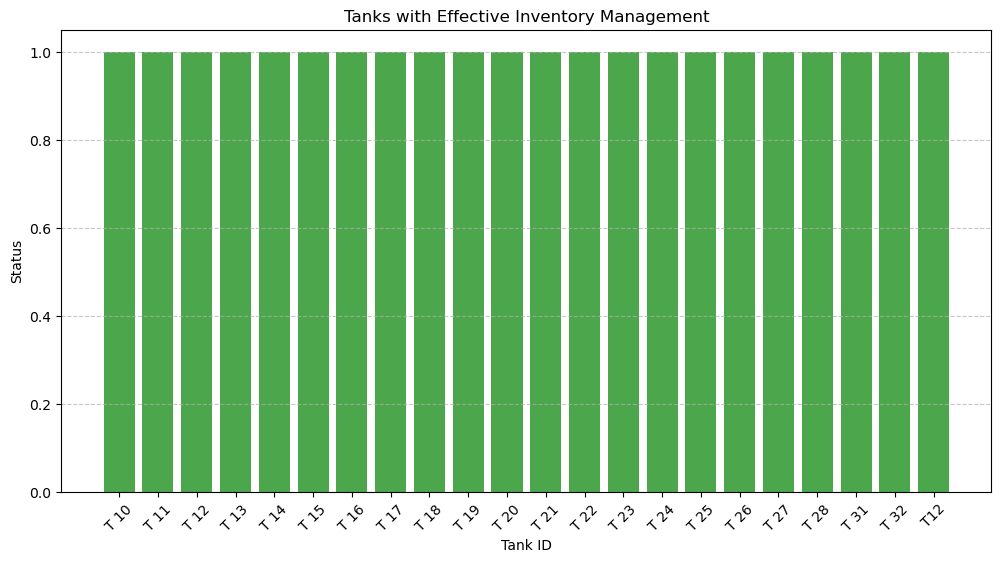

In [75]:
# Plot for Tanks with Effective Inventory Management
plt.figure(figsize=(12, 6))
plt.bar(sorted(list(effective)), [1] * len(effective), color='green', alpha=0.7)
plt.title('Tanks with Effective Inventory Management')
plt.xlabel('Tank ID')
plt.ylabel('Status')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Evaluate Purchasing Patterns:
- Here we calculated discounts based on the amount purchased. we apply a 4%, 3%, or 2% discount based on thresholds of 40,000, 25,000, and 15,000 liters, respectively.
- The discounts are calculated for each row and added as a new column, 'Discount'.
- The total savings for each gas station location are then calculated by grouping the data by 'Invoice Gas Station Location' and summing the 'Discount' values.

In [78]:
# Evaluate Purchasing Patterns
# Apply discounts based on purchase quantity
def calculate_discount(row):
    if row['Amount Purchased'] > 40000:
        return 0.04 * row['Amount Purchased']
    elif row['Amount Purchased'] > 25000:
        return 0.03 * row['Amount Purchased']
    elif row['Amount Purchased'] > 15000:
        return 0.02 * row['Amount Purchased']
    else:
        return 0

In [80]:
merged_data['Discount'] = merged_data.apply(calculate_discount, axis=1)
current_savings = merged_data.groupby('Invoice Gas Station Location')['Discount'].sum()

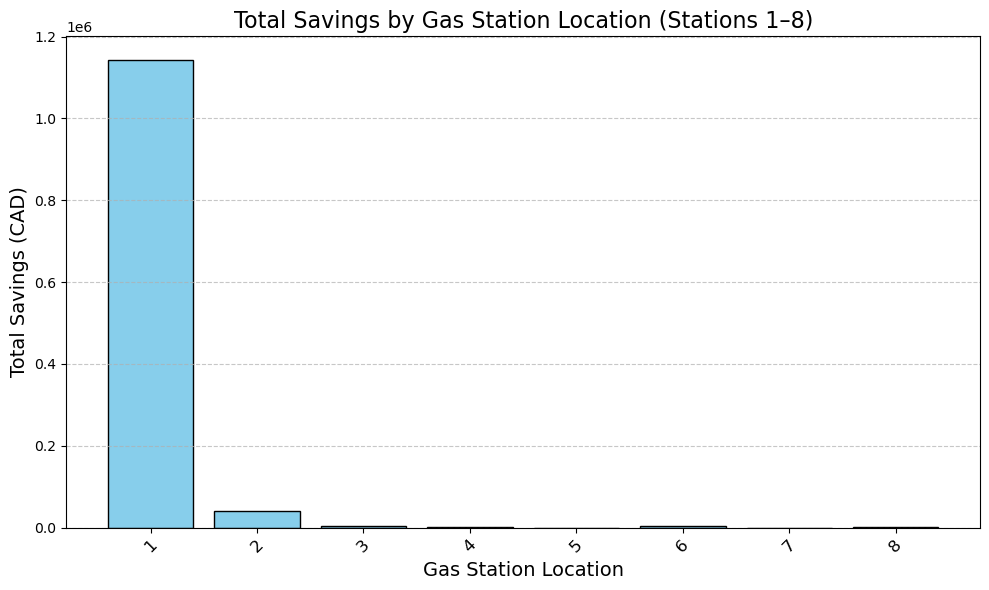

In [82]:
# Define the 8 stations to include in the plot
stations_to_plot = [1, 2, 3, 4, 5, 6, 7, 8]

# Filter the savings data for the selected 8 stations
filtered_savings = current_savings[current_savings.index.isin(stations_to_plot)]

# Plot the savings by gas station location for the 8 stations
plt.figure(figsize=(10, 6))
plt.bar(filtered_savings.index.astype(str), filtered_savings.values, color='skyblue', edgecolor='black')
plt.title('Total Savings by Gas Station Location (Stations 1–8)', fontsize=16)
plt.xlabel('Gas Station Location', fontsize=14)
plt.ylabel('Total Savings (CAD)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 2. Recommend Improved Ordering Strategies

#### **Quantify Maximum Potential Savings**
This section calculates the maximum potential savings that could be achieved by optimizing the order quantities for each gas station location, aiming to maximize discounts while maintaining sufficient inventory.

##### Quantify Maximum Potential Savings 
At this step we have calculated the average daily consumption for each tank by grouping the data by `Tank ID` and `Date`.

In [86]:
# Quantify Maximum Potential Savings
# Calculate daily consumption rates
fuel_levels['Date'] = pd.to_datetime(fuel_levels['Time Stamp']).dt.date
avg_daily_consumption = (fuel_levels.groupby(['Tank ID', 'Date'])['Fuel Level']
                                 .sum()
                                 .groupby('Tank ID')
                                 .mean())

#### Calculate 7-day inventory thresholds and maximum savings:
- The code calculates the 7-day inventory threshold for each location by assuming an average daily consumption rate. It then computes the potential savings by applying the highest applicable discount rate based on the total tank capacity.
- The discount rates are applied based on the following capacity thresholds:
  - > 40,000 liters: 4% discount
  - > 25,000 liters: 3% discount
  - > 15,000 liters: 2% discount
  - <= 15,000 liters: No discount

In [89]:
# Calculate 7-day inventory thresholds and maximum savings
potential_savings = []
for location in merged_data['Invoice Gas Station Location'].unique():
    location_data = merged_data[merged_data['Invoice Gas Station Location'] == location]
    total_capacity = location_data['Tank Capacity'].sum()
    avg_daily_usage = avg_daily_consumption.mean()  # Simplified assumption
    threshold = avg_daily_usage * 7

    if total_capacity > 40000:
        max_discount_rate = 0.04
    elif total_capacity > 25000:
        max_discount_rate = 0.03
    elif total_capacity > 15000:
        max_discount_rate = 0.02
    else:
        max_discount_rate = 0

    savings = max_discount_rate * total_capacity
    potential_savings.append({'Location': location, 'Max Savings': savings})

potential_savings_df = pd.DataFrame(potential_savings)

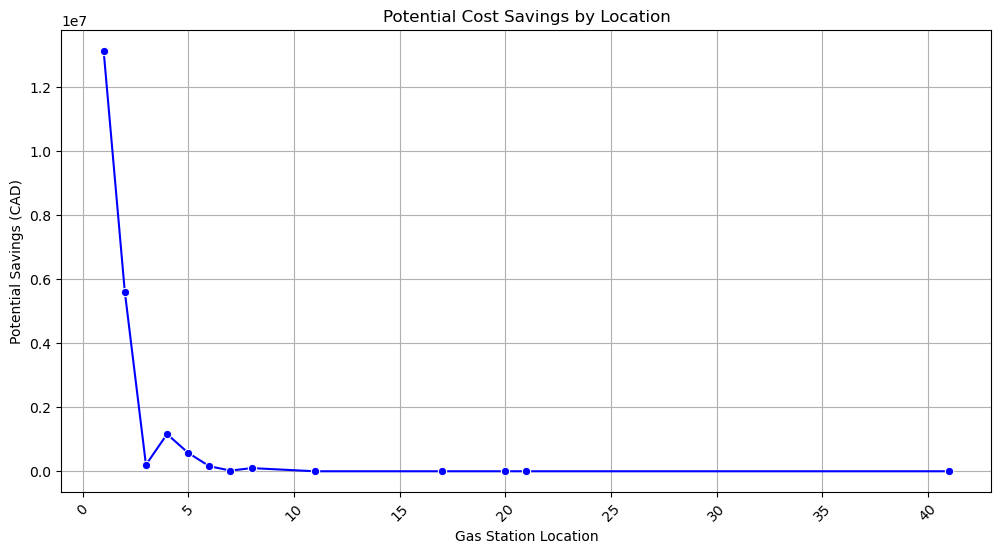

In [91]:
# Recommendations Visualization with line chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=potential_savings_df, x='Location', y='Max Savings', marker='o', color='blue')
plt.title('Potential Cost Savings by Location')
plt.xlabel('Gas Station Location')
plt.ylabel('Potential Savings (CAD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

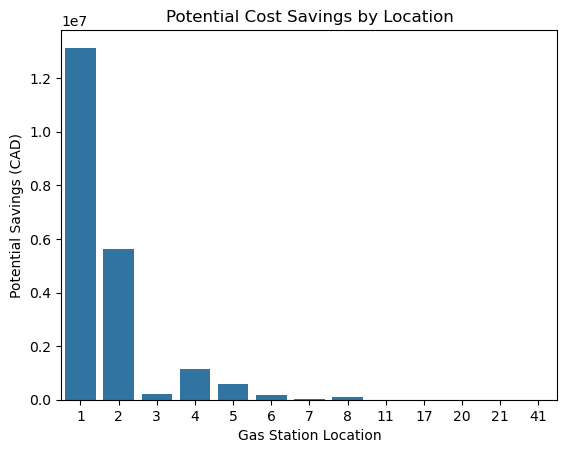

In [93]:
# Recommendations Visualization
sns.barplot(data=potential_savings_df, x='Location', y='Max Savings')
plt.title('Potential Cost Savings by Location')
plt.xlabel('Gas Station Location')
plt.ylabel('Potential Savings (CAD)')
plt.show()

#### **Potential Maximum Savings by Location**
The abve plots displays the potential maximum savings for each gas station location, calculated based on the total tank capacity and applicable discount rates. These savings represent the maximum possible savings for each location if the fuel order quantities were optimized.

**Results:**
- **Locations with significant savings:** 
  - Location 1 has the highest potential savings of **13,132,800 CAD**, followed by Location 2 with **5,614,400 CAD**.
  - Locations 4 and 5 also show considerable savings of **1,161,600 CAD** and **574,000 CAD**, respectively.
- **Locations with no potential savings:** 
  - Locations 20, 17, 21, 41, and 11 show no potential savings (0 CAD), indicating that their fuel order quantities are already optimized or fall below the discount thresholds.

In [96]:
# Print insights
print("Current Savings by Location:")
print(current_savings)

Current Savings by Location:
Invoice Gas Station Location
1     1.143524e+06
2     4.118529e+04
3     3.910101e+03
4     6.867334e+02
5     0.000000e+00
6     4.385685e+03
7     0.000000e+00
8     2.670793e+03
11    0.000000e+00
17    0.000000e+00
20    0.000000e+00
21    0.000000e+00
41    0.000000e+00
Name: Discount, dtype: float64


In [98]:
print("\nPotential Maximum Savings by Location:")
print(potential_savings_df)


Potential Maximum Savings by Location:
    Location  Max Savings
0          1   13132800.0
1          2    5614400.0
2          4    1161600.0
3          5     574000.0
4          6     158400.0
5          3     204000.0
6          7      20800.0
7          8      99200.0
8         20          0.0
9         17          0.0
10        21          0.0
11        41          0.0
12        11          0.0


### **3. Identify the Best Day for Fuel Orders**

In this section, we analyze whether a specific day of the week consistently offers lower fuel prices. We'll explore the distribution of price-per-liter rates by day and identify the day with the lowest historical rates. Additionally, we will calculate the additional savings if purchases were consistently made on the identified day.

#### **Step 1: Convert Invoice Date and Extract Day of the Week**
We first convert the `Invoice Date` to datetime format and extract the day of the week to identify which day of the week is associated with each purchase.

In [102]:
# Convert Invoice Date to datetime and extract day of the week
invoices['Invoice Date'] = pd.to_datetime(invoices['Invoice Date'])
invoices['Day of Week'] = invoices['Invoice Date'].dt.day_name()

#### **Step 2: Calculate Price per Liter**
Next, we calculate the price per liter by dividing the `Gross Purchase Cost` by the `Amount Purchased` for each invoice.

In [105]:
# Calculate price per liter
invoices['Price per Liter'] = invoices['Gross Purchase Cost'] / invoices['Amount Purchased']

#### **Step 3: Visualize Distribution of Price per Liter by Day of the Week**
We use a box plot to visualize the distribution of price-per-liter rates by day of the week. This allows us to observe if any particular day consistently offers lower prices.

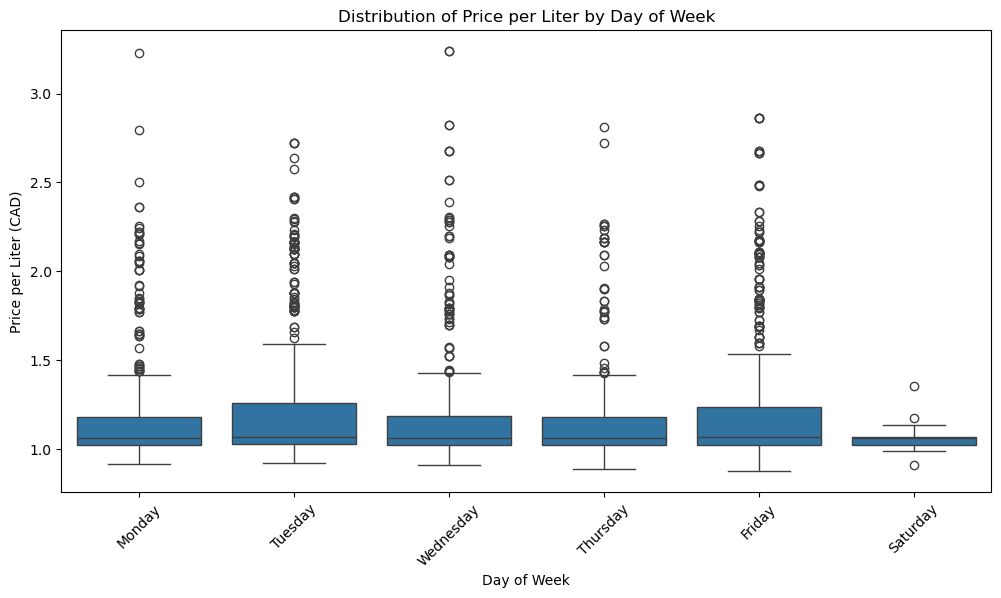

In [108]:
# Examine the distribution of price-per-liter rates by day of the week
plt.figure(figsize=(12, 6))
sns.boxplot(data=invoices, x='Day of Week', y='Price per Liter')
plt.title('Distribution of Price per Liter by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Price per Liter (CAD)')
plt.xticks(rotation=45)
plt.show()

### Results:
The best day for fuel orders, based on the historical price data, is **Saturday**, with the lowest average price per liter.

In [111]:
# Identify the day with the lowest historical rates
avg_price_per_day = invoices.groupby('Day of Week')['Price per Liter'].mean().sort_values()
best_day = avg_price_per_day.idxmin()
print(f'The best day for fuel orders is: {best_day}')

The best day for fuel orders is: Saturday


### Potential Savings Calculation
The total potential savings for purchases made on Saturday is **CAD 2,125,200.17.**

In [114]:
# Calculate additional savings if purchases were consistently made on the best day
best_day_price = avg_price_per_day.min()
invoices['Potential Savings'] = (invoices['Price per Liter'] - best_day_price) * invoices['Amount Purchased']
total_potential_savings = invoices['Potential Savings'].sum()
print(f'Total potential savings if purchases were made on {best_day}: CAD {total_potential_savings:.2f}')

Total potential savings if purchases were made on Saturday: CAD 2125200.17


#### **4. Evaluate the Feasibility of Adding Tanks:**

To assess whether increasing tank capacity at certain locations would be beneficial, we estimate the cost and benefit of adding additional tanks over a 5-year period, considering the cost of adding a new tank, maintenance, and inflation.

#### **Step 1: Assumptions for Cost and Inflation:**
We define the cost of adding a new tank, the annual maintenance cost, and assume an annual inflation rate for the calculation.

- **Cost of adding a new tank**: CAD 50,000
- **Annual maintenance cost**: CAD 5,000
- **Inflation rate**: 2% annually

In [118]:
#Let's Suppose
tank_cost = 50000  # CAD
maintenance_cost = 5000  # Annual CAD
inflation_rate = 0.02  # 3% annual inflation
annual_savings_per_tank = potential_savings_df['Max Savings'].mean() * 1000

#### **Step 2: 5-Year Cost Calculation:**
We calculate the total cost over 5 years, considering both the initial cost and maintenance costs, adjusted for inflation.

In [121]:
# 5-Year Cost Calculation
years = np.arange(1, 6)
inflated_costs = tank_cost * (1 + inflation_rate) ** years
total_cost_5_years = tank_cost + (maintenance_cost * years).sum()

#### **Step 3: 5-Year Benefit Calculation:**
Next, we calculate the total benefit over 5 years by considering the average annual savings per tank and multiplying it by 5 years.

In [124]:
# 5-Year Benefit Calculation
total_benefit_5_years = annual_savings_per_tank * 5
net_benefit = total_benefit_5_years - total_cost_5_years

#### **Step 4: Feasibility of Adding a Tank:**
Finally, we determine whether the locations would benefit from adding a tank by comparing the potential savings with the 5-year cost of adding a tank.

In [127]:
# Determine Beneficial Locations
potential_savings_df['Feasibility'] = potential_savings_df['Max Savings'] > (total_cost_5_years / (5 * 1000))

In [129]:
print(f"Estimated 5-year cost of adding a tank: {total_cost_5_years:.2f} CAD")
print(f"Estimated 5-year benefit: {total_benefit_5_years:.2f} CAD")
print(f"Net benefit of adding a tank: {net_benefit:.2f} CAD")

Estimated 5-year cost of adding a tank: 125000.00 CAD
Estimated 5-year benefit: 8063538461.54 CAD
Net benefit of adding a tank: 8063413461.54 CAD


#### **Conclusion:**
Adding a tank at certain locations is highly beneficial, with a significant net benefit of **CAD 8,063,413,461.54** over 5 years. Locations like **1, 2, 4, and 5** are particularly well-positioned for this investment, as their potential savings far outweigh the cost of adding a new tank.

In [132]:
# Print message
print("Locations where adding a tank is feasible:")

# Print the table
print(potential_savings_df[potential_savings_df['Feasibility']])

Locations where adding a tank is feasible:
   Location  Max Savings  Feasibility
0         1   13132800.0         True
1         2    5614400.0         True
2         4    1161600.0         True
3         5     574000.0         True
4         6     158400.0         True
5         3     204000.0         True
6         7      20800.0         True
7         8      99200.0         True
